<a href="https://colab.research.google.com/github/benjaminsw/Generalised_Linear_Models/blob/main/R_doctors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
if (!require('gsheet')) install.packages('gsheet'); library('gsheet')
if (!require('xtable')) install.packages('xtable'); library('xtable')

# set plot size
options(repr.plot.width=16, repr.plot.height=8)

Loading required package: xtable

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘xtable’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
url <- 'https://docs.google.com/spreadsheets/d/1dcL4QlwJrpL3XGkmR-g3OtuDjL-QT-3Q_UwARWIyN8s/edit?usp=sharing'
doctors  <- gsheet2tbl(url)

head(doctors)

age,smoking,deaths,person-years
<chr>,<chr>,<dbl>,<dbl>
35 to 44,smoker,32,52407
45 to 54,smoker,104,43248
55 to 64,smoker,206,28612
65 to 74,smoker,186,12663
75 to 84,smoker,102,5317
35 to 44,non-smoker,2,18790


In [9]:
# fix  column names
names(doctors) <- gsub(x = names(doctors), pattern = "\\-", replacement = ".")  
head(doctors)

age,smoking,deaths,person.years
<chr>,<chr>,<dbl>,<dbl>
35 to 44,smoker,32,52407
45 to 54,smoker,104,43248
55 to 64,smoker,206,28612
65 to 74,smoker,186,12663
75 to 84,smoker,102,5317
35 to 44,non-smoker,2,18790


In [10]:
par (mar=c(3,3,2,1), mgp=c(2,.7,0), tck=-.01)

In [11]:
# Death rate per 100,000 person-years:
doctors$rates <- doctors$deaths/doctors$person.years*100000

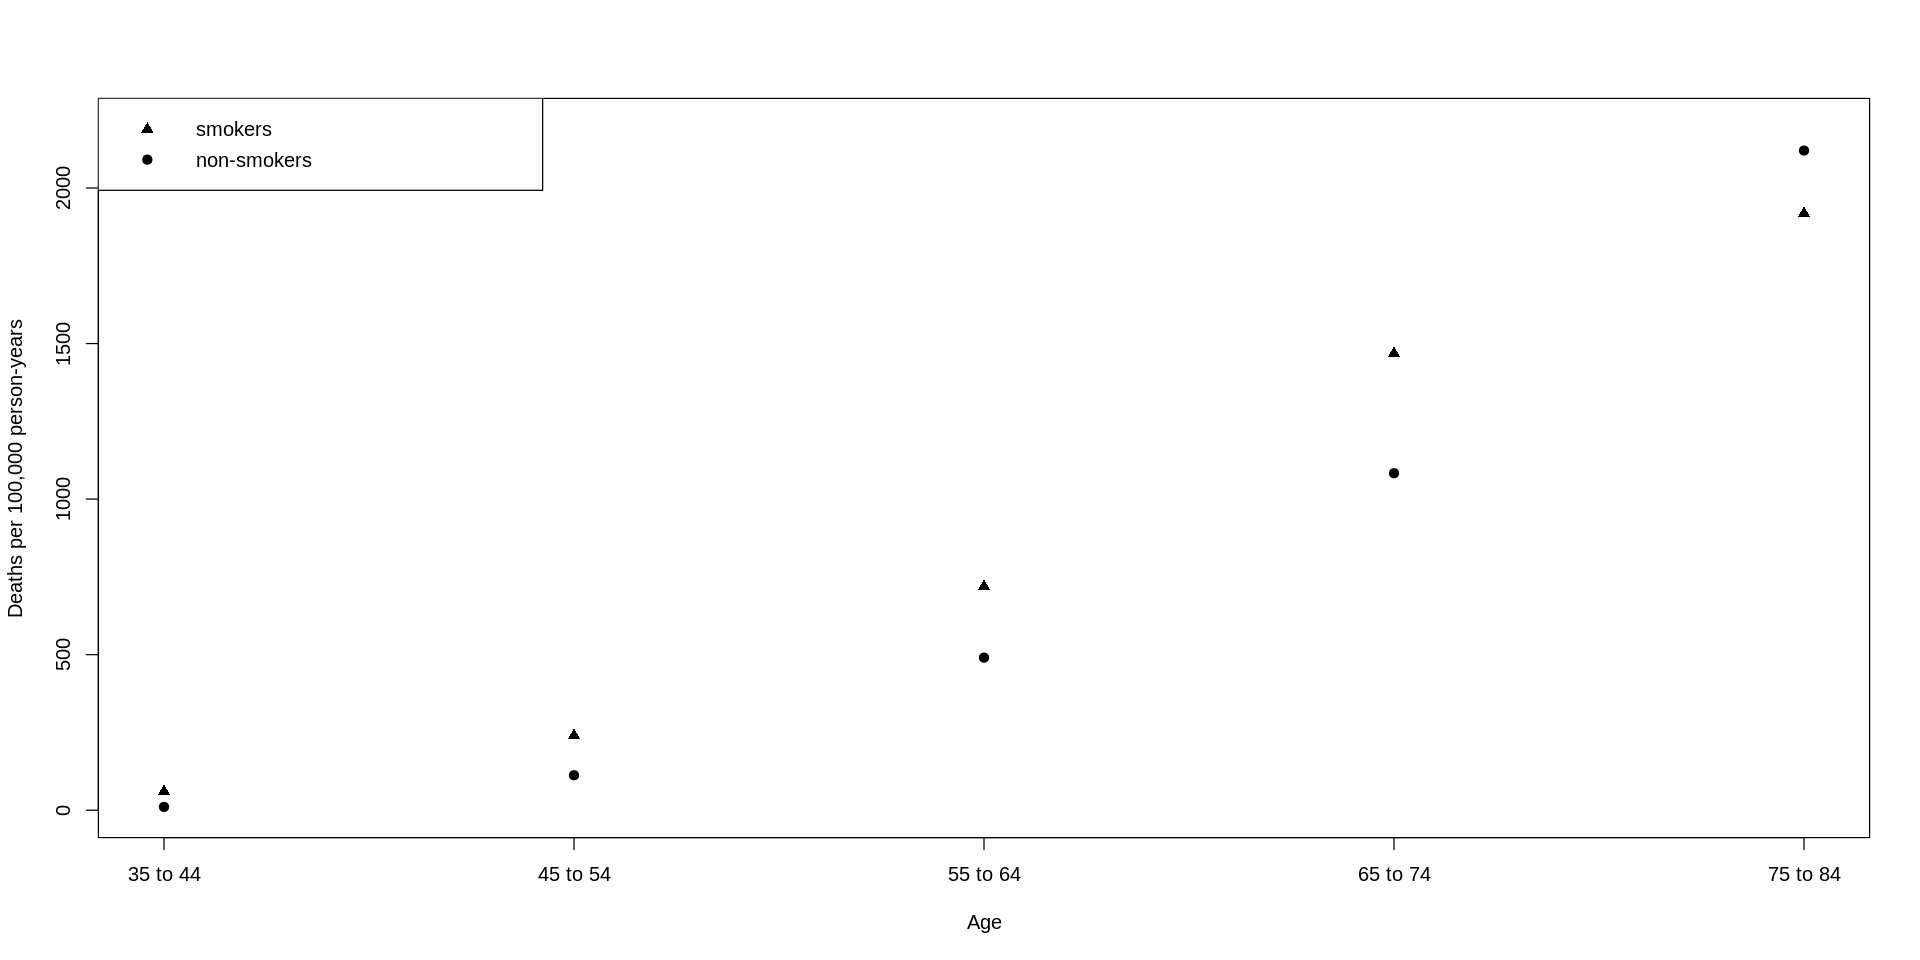

In [16]:
# Plotted death rates by smoking status:
# png("deathrates.png", width = 7, height = 5.5, units="in", res=1024)

plot(doctors$rates[doctors$smoking=="smoker"], pch=17, xlab="Age", xaxt="n", ylab="Deaths per 100,000 person-years", ylim=c(0,2200))
points(doctors$rates[doctors$smoking=="non-smoker"], pch=19)

axis(side=1, at=1:5,labels=doctors$age[doctors$smoking=="smoker"])

legend("topleft", legend=c("smokers", "non-smokers"), pch=c(17,19))

# dev.off()

In [14]:
# Define an ordinal age variable and its square:

doctors$agecat<-1
doctors$agecat[doctors$age=="45 to 54"] <-2
doctors$agecat[doctors$age=="55 to 64"] <-3
doctors$agecat[doctors$age=="65 to 74"] <-4
doctors$agecat[doctors$age=="75 to 84"] <-5

doctors$agesq <- doctors$agecat^2

doctors

age,smoking,deaths,person.years,rates,agecat,agesq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35 to 44,smoker,32,52407,61.06055,1,1
45 to 54,smoker,104,43248,240.47355,2,4
55 to 64,smoker,206,28612,719.97763,3,9
65 to 74,smoker,186,12663,1468.84624,4,16
75 to 84,smoker,102,5317,1918.37502,5,25
35 to 44,non-smoker,2,18790,10.64396,1,1
45 to 54,non-smoker,12,10673,112.43324,2,4
55 to 64,non-smoker,28,5710,490.36778,3,9
65 to 74,non-smoker,28,2585,1083.17215,4,16


In [17]:
# Define smkage variable equal to agecat for smokers and zero for non-smokers (this is the same as including the iteraction term agecat:smoking in the model):

doctors$smkage <- 0
doctors$smkage[doctors$smoking=="smoker"] <- doctors$agecat[doctors$smoking=="smoker"]

doctors

age,smoking,deaths,person.years,rates,agecat,agesq,smkage
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35 to 44,smoker,32,52407,61.06055,1,1,1
45 to 54,smoker,104,43248,240.47355,2,4,2
55 to 64,smoker,206,28612,719.97763,3,9,3
65 to 74,smoker,186,12663,1468.84624,4,16,4
75 to 84,smoker,102,5317,1918.37502,5,25,5
35 to 44,non-smoker,2,18790,10.64396,1,1,0
45 to 54,non-smoker,12,10673,112.43324,2,4,0
55 to 64,non-smoker,28,5710,490.36778,3,9,0
65 to 74,non-smoker,28,2585,1083.17215,4,16,0


In [18]:
# Fit a Poisson regression model:

m1 <- glm(deaths~ agecat+agesq+ smoking+smkage+offset(log(person.years)), family=poisson, data=doctors)

summary(m1)


Call:
glm(formula = deaths ~ agecat + agesq + smoking + smkage + offset(log(person.years)), 
    family = poisson, data = doctors)

Deviance Residuals: 
       1         2         3         4         5         6         7         8  
 0.43820  -0.27329  -0.15265   0.23393  -0.05700  -0.83049   0.13404   0.64107  
       9        10  
-0.41058  -0.01275  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -10.79176    0.45008 -23.978  < 2e-16 ***
agecat          2.37648    0.20795  11.428  < 2e-16 ***
agesq          -0.19768    0.02737  -7.223 5.08e-13 ***
smokingsmoker   1.44097    0.37220   3.872 0.000108 ***
smkage         -0.30755    0.09704  -3.169 0.001528 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 935.0673  on 9  degrees of freedom
Residual deviance:   1.6354  on 5  degrees of freedom
AIC: 66.703

Number of Fisher Scoring iterations: 4


In [19]:
summary(glm(deaths~ agecat+agesq+ smoking +agecat:smoking+offset(log(person.years)), family=poisson, data=doctors) )


Call:
glm(formula = deaths ~ agecat + agesq + smoking + agecat:smoking + 
    offset(log(person.years)), family = poisson, data = doctors)

Deviance Residuals: 
       1         2         3         4         5         6         7         8  
 0.43820  -0.27329  -0.15265   0.23393  -0.05700  -0.83049   0.13404   0.64107  
       9        10  
-0.41058  -0.01275  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -10.79176    0.45008 -23.978  < 2e-16 ***
agecat                 2.37648    0.20795  11.428  < 2e-16 ***
agesq                 -0.19768    0.02737  -7.223 5.08e-13 ***
smokingsmoker          1.44097    0.37220   3.872 0.000108 ***
agecat:smokingsmoker  -0.30755    0.09704  -3.169 0.001528 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 935.0673  on 9  degrees of freedom
Residual deviance:   1.6354  on 5  degrees of freedom
AIC: 66.

In [20]:
# Fitted probabilities
fitted(m1)


1          2          3          4          5          6          7 
 29.584734 106.811960 208.198646 182.827893 102.576767   3.414801  11.541629 
         8          9         10 
 24.743377  30.229155  31.071038

In [21]:
pearsonres <- (doctors$deaths-fitted(m1))/sqrt(fitted(m1))
pearsonres

1           2           3           4           5           6 
 0.44404929 -0.27208163 -0.15237591  0.23459923 -0.05694769 -0.76561908 
          7           8           9          10 
 0.13492231  0.65469354 -0.40544060 -0.01274427

In [22]:
# You can also get these directly:

pres <- resid(m1, type="pearson")
pres

1           2           3           4           5           6 
 0.44404929 -0.27208163 -0.15237591  0.23459923 -0.05694769 -0.76561908 
          7           8           9          10 
 0.13492231  0.65469354 -0.40544060 -0.01274427

In [35]:
# Combine together the age category, smoking status, observed and expected number of deaths and Pearson and deviance residuals

round(cbind(doctors$agecat, as.factor(doctors$smoking), doctors$deaths, fitted(m1), pearsonres, resid(m1)), 3)

,,,,,pearsonres,
1,1,2,32,29.585,0.444,0.438
2,2,2,104,106.812,-0.272,-0.273
3,3,2,206,208.199,-0.152,-0.153
4,4,2,186,182.828,0.235,0.234
5,5,2,102,102.577,-0.057,-0.057
6,1,1,2,3.415,-0.766,-0.830
7,2,1,12,11.542,0.135,0.134
8,3,1,28,24.743,0.655,0.641
9,4,1,28,30.229,-0.405,-0.411
10,5,1,31,31.071,-0.013,-0.013


In [25]:
# xtable(cbind(doctors$agecat, doctors$smoking, doctors$deaths, fitted(m1), pearsonres, resid(m1)), digits=c(0,0,0,0,2,3,3))

# Pearson chi-squared statistic:

X2 <- sum(pres^2)
X2

[1] 1.550251